<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 12</h1>
</div>

# 1. Modules and paths
# 2. Importing paths via `use`
# 3. Structs inside modules
# 4. Separating modules into multiple files
# 5. Crates: What are they?
# 6. Using external crates: `rand` (random numbers) and `csv` (reading csv)
# 7. Libraries and other Binaries
# 8. File I/O
# 9. Networking Basics


## Modules

Up to now: **our** functions and data types (mostly) in the same namespace<br>
&nbsp;&nbsp;&nbsp;$\bullet$ **exception:** functions in structs and enums

One can create a namespace, using `mod`

In [8]:
mod things_to_say {
    fn say_hi() {
        say("Hi");
    }
    
    fn say_bye() {
        say("Bye");
    }
    
    fn say(what: &str) {
        println!("{}!",what);
    }
}

You have to use the module name to refer to access a function.

In [9]:
things_to_say::say_hi();

Error: function `say_hi` is private

## Modules

* By default, all definitions in the namespace are private.
* Advantage: Can hide all internally used code
* Use `pub` to make functions or types public

In [10]:
mod things_to_say {
    pub fn say_hi() {
        say("Hi");
    }
    
    pub fn say_bye() {
        say("Bye");
    }
    
    fn say(what: &str) {
        println!("{}!",what);
    }
}

In [11]:
things_to_say::say_hi();

Hi!


### Why modules?

* limit number of additional identifiers in the main namespace

* organize your codebase into meaningful parts

* hide auxiliary internal code


* By default, all definitions in the namespace are private.
* Advantage: one can hide all internally used code
* Use `pub` to make functions or types public

## Nesting possible

In [12]:
mod level_1 {

    mod level_2_1 {

        mod level_3 {

            pub fn where_am_i() {println!("3");}

        }

        pub fn where_am_i() {println!("2_1");}
        
    }
    
    mod level_2_2 {
        
        pub fn where_am_i() {println!("2_2");}
        
    }
    
    pub fn where_am_i() {println!("1");}
    
}

In [13]:
level_1::level_2_1::level_3::where_am_i();




















Error: module `level_2_1` is private

In [14]:
mod level_1 {

    pub mod level_2_1 {

        pub mod level_3 {

            pub fn where_am_i() {println!("3");}

        }

        pub fn where_am_i() {println!("2_1");}
        
    }
    
    pub mod level_2_2 {
        
        pub fn where_am_i() {println!("2_2");}
        
    }
    
    pub fn where_am_i() {println!("1");}
    
}

In [16]:
level_1::level_2_2::where_am_i();

2_2


<div align="center">
<img src="namespace_tree.png" alt="[namespace tree]" width="50%">
</div>

## Paths to modules

In [2]:
pub mod level_1 {

    pub mod level_2_1 {
        
        pub mod level_3 {

            pub fn where_am_i() {println!("3");}
            
            pub fn call_someone_else() {
                where_am_i();
            }
        }

        pub fn where_am_i() {println!("2_1");}
    }
    
    pub mod level_2_2 {
        
        pub fn where_am_i() {println!("2_2");}
        
    }
    
    pub fn where_am_i() {println!("1");}
    
}

fn where_am_i() {println!("main namespace");}

In [3]:
level_1::level_2_1::level_3::call_someone_else();

3


## Paths to modules

**Global paths:** start from `crate`

In [23]:
mod level_1 {
    pub mod level_2_1 {
        pub mod level_3 {
            pub fn where_am_i() {println!("3");}
            
            pub fn call_someone_else() {
                crate::where_am_i();
                crate::level_1::level_2_2::
                    where_am_i();
                where_am_i();
            }
        }
        pub fn where_am_i() {println!("2_1");}
    }
    pub mod level_2_2 {   
        pub fn where_am_i() {println!("2_2");}
    }
    
    pub fn where_am_i() {println!("1");}
}

fn where_am_i() {println!("main namespace");}

In [24]:
level_1::level_2_1::level_3::call_someone_else();

main namespace
2_2
3


## Paths to modules

**Local paths:**
* going one or many levels up via `super`

In [25]:
mod level_1 {
    pub mod level_2_1 {
        pub mod level_3 {
            pub fn where_am_i() {println!("3");}
            
            pub fn call_someone_else() {
                super::where_am_i();
                super::super::where_am_i();
                super::super::
                    level_2_2::where_am_i();
            }
        }
        pub fn where_am_i() {println!("2_1");}
    }
    pub mod level_2_2 {   
        pub fn where_am_i() {println!("2_2");}
    }
    
    pub fn where_am_i() {println!("1");}
}

fn where_am_i() {println!("main namespace");}

In [26]:
level_1::level_2_1::level_3::call_someone_else();

2_1
1
2_2


## `use` to import things into the current scope


In [10]:
mod level_1 {
    pub mod level_2_1 {
        pub mod level_3 {
            pub fn where_am_i() {println!("3");}
            
            pub fn call_someone_else() {
                super::where_am_i();
            }
        }
        pub fn where_am_i() {println!("2_1");}
    }
    pub mod level_2_2 {   
        pub fn where_am_i() {println!("2_2");}
    }
    
    pub fn where_am_i() {println!("1");}
}

fn where_am_i() {println!("main namespace");}



In [11]:
// Bring a submodule to current scope:
use level_1::level_2_1::level_3;
level_3::where_am_i();
// Bring a specific function/type to current scope:
// (Don't do that, it can be confusing).
use level_3::call_someone_else();
call_someone_else();
// Bring multiple items to current scope:
use level_3::{where_am_i,call_someone_else};
where_am_i();

3
2_1
3


## Structs within modules

In [27]:
pub mod test {
    #[derive(Debug)]
    pub struct Point {
       x: i32,
       y: i32,
    }

    impl Point {
        pub fn create(x:i32,y:i32) -> Point {
            Point{x,y}
        }
        
    }

}


In [28]:
use test::Point;
let mut p = Point::create(2,3);
println!("{:?}",p);
p.x = 3;
println!("{:?}",p);

Error: field `x` of struct `Point` is private

## Structs within modules

Make fields and functions public to be accessible

In [29]:
mod test {
    #[derive(Debug)]
    pub struct Point {
       pub x: i32,
       y: i32,
    }

    impl Point {
        pub fn create(x:i32,y:i32) -> Point {
            Point{x,y}
        }
        
        pub fn update_y(&mut self, y:i32) {
            self.y = y;
        }
    }

}


In [30]:
use test::Point;
let mut p = Point::create(2,3);
println!("{:?}",p);
p.x = 3;
println!("{:?}",p);

p.update_y(2022);
p

Point { x: 2, y: 3 }
Point { x: 3, y: 3 }


Point { x: 3, y: 2022 }

## Starting point: examples from last week

* Creating a graph representation
* Counting triangles
* Also: get a neighbor of a vertex

<br><br>
<div align="center">
    <b>[live demo: one-file example]</b>
</div>

## Moving a module to separate file

Content of module `abc`
* either in `src/abc.rs`
* or `src/abc/mod.rs`

In `main.rs` replace it with `mod abc;`

**Submodules:**

Example `abc::def`
* either in `src/abc/def.rs`
* or in `src/abc/def/mod.rs`

Use `mod` recursively

<div align="center">
    <b>[live demo: splitting the sample file into <code>main.rs</code> and three submodules]</b>
</div>

## What are crates?

Crates provided by a project:
* Each binary produced by a project (function `main` is the starting point)
  * So far we have seen single binaries
* A single library crate: can be used by other projects 

## Shared crates

**Where to find crates:**
* Official list: https://crates.io
* Unofficial list: https://lib.rs

**Documentation:**
* https://docs.rs

## Crate `rand`: random numbers
See: https://crates.io/crates/rand

Tell Rust you want to use it:
* edit `Cargo.toml`
* add `rand="0.8.5"` below dependencies

To generate a random integer from $1$ through $100$:
  * add `use rand::Rng`
  * then `rand::thread_rng().gen_range(1..=100)`

<div align="center">
    <b>[live demo: add <code>get_random</code> to <code>graphs::neighbors</code>]</b>
</div>

## Crate `csv` and `serde`: reading a CSV file
See:
  * https://crates.io/crates/csv
  * https://crates.io/crates/serde

<br><br>
<div align="center">
    <b>[live demo]</b>
</div>

* Create a new project
* Add to `Cargo.toml`:
```
   csv = "1.1.6"
   serde = "1.0.136"
```

* Copy the second example from the `csv` docs
* Update the field names

## Crate `csv` (and `serde`): reading a CSV file

**Solution:** modify `Cargo.toml` for `serde`
```
serde = { version = "1.0.136", features = ["derive"] }
```

**Our case:** add this before `Record` to supress warnings
```
#[allow(dead_code,non_snake_case)]
```

**Bottom line:**
* parameters other than the version number possible in `Cargo.toml`

### How to add multiple binaries to your project

[[bin]]  
name = "some_name"  
path = "some_directory/some_file.rs"  

**The file some_file.rs must contain a fn main()**


### How to add a library to your project

[lib]  
name = "some_name"  
path = "src/lib/lib.rs"  

**The file lib.rs does not need to contain a fn main()**

### You can have as many binaries are you want in a project but only one library!



## Relying on external projects

Things to consider about external libraries:
* trustworthy?
* stable?
* long–term survival?
* do you really need it?

Many things best left to professionals:

<div align="center">
    <b><font color="red">Never implement your own crypto!</font></b>
</div>

Implementing your own things can be a great educational experience!

## Extreme example

<br>
<div align="center">
    <img src="left-pad.png" alt="[article about left-pad]" width="35%">
</div>
</br>

Rust and `cargo`: can't delete libraries that were published

# <font color="red">8. File I/O</font>

In [3]:
:dep rand="0.8.5"

use std::fs::File;
use std::io::prelude::*;
use rand::Rng;


fn generate_file(path: &str, n: usize) {
    // Generate a random file of edges for vertices 0.n
    let mut file = File::create(path).expect("Unable to create file");
    for i in 0..n {
        // How many neighbors will this node have
        let rng = rand::thread_rng().gen_range(0..20) as usize;
        for _j in 0..rng {
            // Randomly select a neighbor (even with duplicates but not to ourselves)
            let neighbor = rand::thread_rng().gen_range(0..n) as usize;
            if neighbor != i {
                let s: String = format!("{} {}\n", i, neighbor);
                file.write_all(s.as_bytes()).expect("Unable to write file");
            }
        }
    }
}

fn read_file(path: &str) -> Vec<(u32, u32)> {
    let mut result: Vec<(u32, u32)> = Vec::new();
    let file = File::open(path).expect("Could not open file");
    let buf_reader = std::io::BufReader::new(file).lines();
    for line in buf_reader {
        let line_str = line.expect("Error reading");
        let v: Vec<&str> = line_str.trim().split(' ').collect();
        let x = v[0].parse::<u32>().unwrap();
        let y = v[1].parse::<u32>().unwrap();
        result.push((x, y));
    }
    return result;
}

println!("Generating file");
generate_file("list_of_edges.txt", 10);
let edges = read_file("list_of_edges.txt");
println!("{:?}", edges);

Generating file
[(0, 7), (0, 6), (0, 8), (0, 3), (0, 8), (0, 5), (0, 8), (0, 5), (0, 5), (0, 4), (0, 5), (0, 6), (0, 5), (1, 6), (1, 3), (1, 9), (1, 6), (1, 9), (1, 3), (1, 5), (1, 2), (1, 0), (1, 3), (1, 7), (1, 5), (2, 4), (2, 3), (2, 5), (2, 7), (2, 7), (2, 6), (2, 3), (2, 3), (2, 3), (2, 9), (2, 7), (2, 3), (3, 9), (3, 8), (3, 4), (3, 7), (4, 6), (4, 8), (5, 7), (5, 7), (5, 8), (5, 8), (6, 9), (6, 4), (6, 1), (6, 7), (6, 4), (6, 9), (6, 8), (7, 9), (7, 8), (7, 2), (7, 8), (7, 2), (7, 6), (7, 6), (7, 9), (7, 8), (7, 2), (7, 9), (7, 1), (7, 4), (7, 4), (7, 8), (8, 4), (8, 3), (8, 5), (8, 3), (8, 1), (8, 4), (8, 1), (8, 5), (8, 0), (8, 5), (8, 3), (9, 7), (9, 6), (9, 8), (9, 0), (9, 7), (9, 8), (9, 7), (9, 0), (9, 7), (9, 8), (9, 3), (9, 7), (9, 4), (9, 0), (9, 2)]



# Networking Basics
## 1. The OSI Stack
## 2. IP
## 3. TCP
## 4. DNS
## 5. HTTP

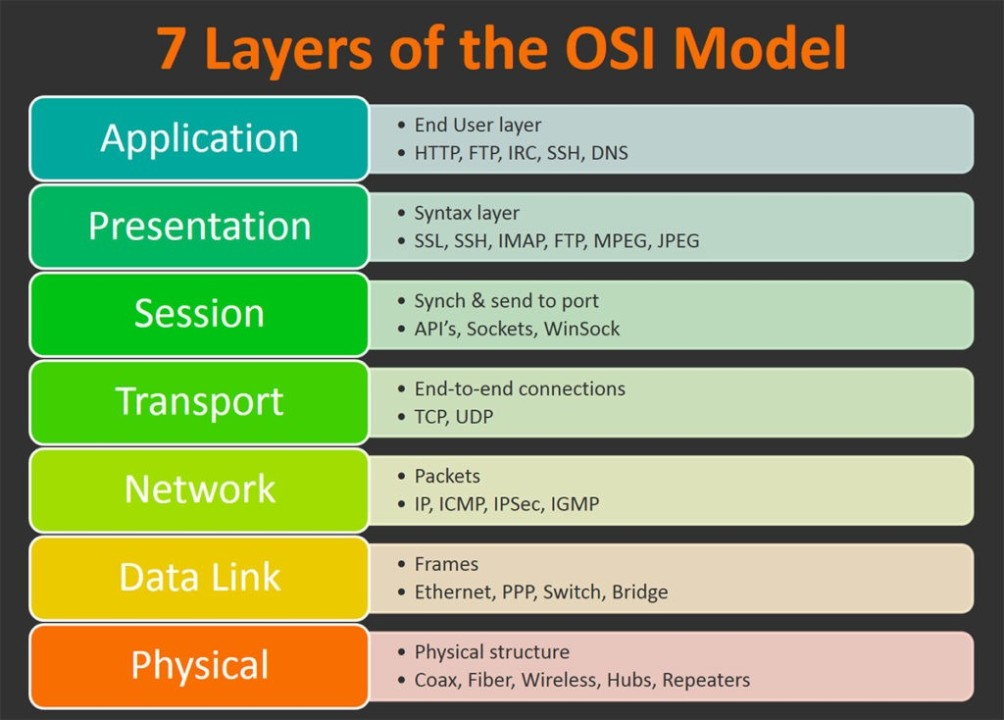

## Some key networking protocols

#### * IP -> Internet Protocol:  Provides names (addresses) to devices and allows them to become reachable.
#### * TCP -> Transmission Control Protocol: Make communication reliable, cooperative and fast
#### * DNS -> Domain Name System: Allow mnemonic names for devices and provide translation between those and IPs
#### * HTTP -> HyperText Transfer Protocol: Connectionless/Stateless Transfers.  Media Independent.  Human readable (sort of)

# 1. IP

* IPv4 -- 32 bit addresses commonly written as x.y.z.w with values ranging from 0-255
  * subnets defined with /.  E.g. 10.0.0.0/8 implies all addresses that start with 10. while 10.0.0.0/16 implies all addresses that start with 10.0
* IPv6 -- 128 bit addresses commonly written as a:b:v:d:e:f:g:h
  * prefixes defined with same notation 2001:db1:abc1:0012::0/64 implies all addresses that start with 2001:db1:abc1:0012
  * first 48 bits identify the network, next 16 bits the subnetwork and last 64 bits the device within the network.
* Use arin.net (or ripe.net, apnic.net, lacnic.net, afrinic.net, …) to find out who a particular ip address belongs to.


* Private IP addresses
  * 0.0.0.0/8 -> Shorthand for the network I am in.  Not routable.  0.0.0.0 is the current host.
  * 10.0.0.0/8 -> Private network not accessible from the internet
  * 100.64.0.0/10 -> Used by ISPs with carrier grade NATs
  * 127.0.0.0/8 -> Localhost addresses
  * 172.16.0.0/12 -> Private network
  * 192.0.0.0/24 -> Private network
  * 192.168.0.0/16 -> Private network
* Full list: https://en.wikipedia.org/wiki/Reserved_IP_addresses


## IP header
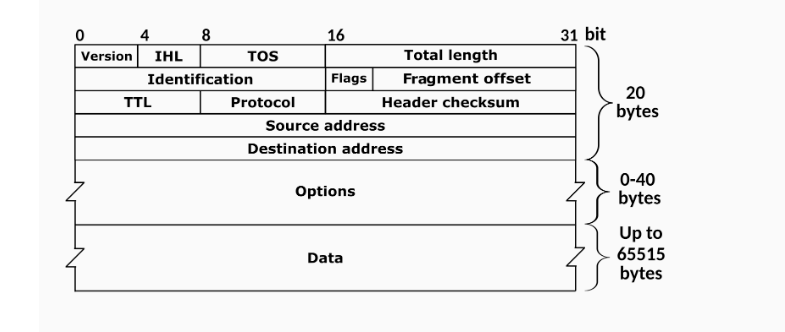

# 2. TCP

* Sequence numbers
* Acknowledgement
* Timeouts
* Congestion control

## TCP States

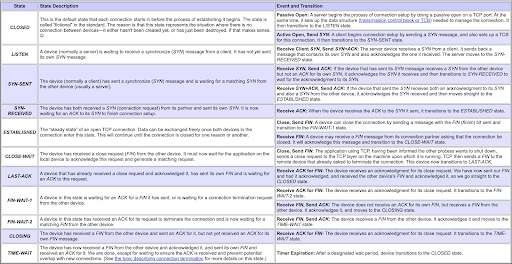

## TCP State Diagram



## TCP Recovery

* When receiving packets in sequence acknowledge sequence number of received packet
* When out of order acknowledge sequence number of last in-order packet
* Resend packets when receiving a duplicate ack
* Resend packets when no ack received after specified timeout.


## TCP Congestion Control

* Number of packets allowed to be in flight
* Start small, increase when delivery is successful, decrease when delivery fails
* Failure can mean packet loss (i.e. TCP Cubic), high latency (i.e. TCP Vegas), low throughput (i.e. TCP BBR)
* Check https://ieeexplore.ieee.org/document/9811217 for comparisons


## Why do packet get lost?



# 3. DNS

* A widely distributed collection of databases that translate between names and IP addresses
* A protocol for talking to those databases
* A schema for inserting/deleting/updating these databases


## The DNS Hierarchy



## DNS concepts

* Client resolver
  * Local library that interacts with name servers
* Recursive nameserver
  * A nameserver that doesn’t know the answer but knows who to ask.  May cache the results
* Authoritative nameserver
  * A nameserver that knows the answer to a particular domain
* Root name server
  * Key 13 name servers that are known to everyone and know about top level domains (i.e. .com, .net, .edu, .org etc).
* TLD name server
  * Name servers handling resolution under .com, .net, .edu, .org etc.
* Domain name server
  * One that can answer what is the IP of a particular host in that domain
* Zone file
  * A file containing the mappings between names and IP addresses
* TTL
  * An indicator on how long the answer is valid for


## DNS Records

* SOA record (Start of Authority)
  * Metadata about the zone file and records that follow
* A and AAA records
  * Actual IP resolutions
* CNAME records
  * A new domain name that is an alias to the question
* MX records
  * Provide the names of the mail servers for the domain
* NS records	
  * Names and IP addresses of the name servers for the domain
* PTR records
  * Used for reverse resolutions
* TXT records
  * Any string you want to associated with a host name
* CAA records
  * Names of cert authorities issuing certs for the domain
* Nice overview at https://www.digitalocean.com/community/tutorials/an-introduction-to-dns-terminology-components-and-concepts 


# 4. HTTP

* Built on top of TCP (or UDP more recently)
* Most commonly built on top of TLS (HTTPS)
* Connectionless and Stateless (A request does not depend on other requests, though it can have side-effects on the server)
* Media independent (payload is independent of the protocol, and negotiated as part of the protocol)

* URL vs URI vs URN
  * URL (Uniform Resource Locator) -- A name identifying a resource that can be fetched with HTTP (i.e. http://www.google.com)
  * URI (Uniform Resource Identifier) -- A name identifying a resource that may or may not be fetchable (URLs are URIs but not vice-versa) (i.e. xmlns:recipe = "https://chef.com/recipe")
  * URN (Uniform Resource Name) -- A name identifying a resource in a unique permanent way but not how to fetch it (i.e. urn:isbn:1234567890


## Protocol Information

* Version: HTTP/1.0, HTTP/1.1, HTTP/2.0, HTTP/3.0
  * Last 2 must be encrypted over TLS
* Message: Can contain headers and bodies
  * Headers are always human readable, key-value pairs
  * Bodies can be text or arbitrary binary data
* Request methods
* GET, HEAD, POST, PUT, DELETE, (CONNECT, OPTIONS, TRACE)
  * PUT vs POST
    * POST implies sending the server some data and letting the server decide which object they affect
    * PUT specifies the object and replaces its value with what is provided


## HTTP Responses

* 1xx -- Informational.  Request was received and being processed (an extra response will follow)
* 2xx -- Success.  Request was processed successfully
* 3xx -- Redirect.  The name of the resource has changed and more client action is required to complete the requests
* 4xx -- Client error.  Something about the resource being requested is wrong.
* 5xx -- Server error. The server encountered an error and could not process the request


### Read chapter 7 from the Rust book